In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

**EfficientFrontier** class can be used for "classic" frontiers where all portfolios are **rebalanced mothly**. It's the most easy and fast way to draw an Efficient Frontier.

### Simple efficient frontier for 2 ETF

In [18]:
ls2 = ['SPY.US', 'BND.US']
curr='USD'
two_assets = ok.EfficientFrontier(symbols=ls2, curr=curr, n_points=100)  # n_points - specifies a number of points in the Efficient Frontier chart (default is 20)
two_assets

symbols              [SPY.US, BND.US]
currency                          USD
first date                    2007-05
last_date                     2020-09
period length (Y)                13.3
inflation                    USD.INFL
dtype: object

**ef_points** property returns the dataframe (table).  
Each row has properties of portfolio or point in the frontier:  
_Risk_ - the volatility or standard deviation  
_Mean return_ - the expectation or arithmetic mean  
_CAGR (approx)_ - Compound annual growth rate calculated with approximation from risk and mean return (to make it faster)  

All the properties have annualized values.  
Last columns are weights for each asset.  

In [20]:
df = two_assets.ef_points
df

,Risk,Mean return,CAGR (approx),BND.US,SPY.US
0,0.038209,0.045074,0.044376,1.000000e+00,1.509337e-09
1,0.037949,0.045595,0.044907,9.898990e-01,1.010101e-02
2,0.037759,0.046117,0.045436,9.797980e-01,2.020202e-02
3,0.037642,0.046639,0.045962,9.696970e-01,3.030303e-02
4,0.037598,0.047161,0.046486,9.595960e-01,4.040404e-02
...,...,...,...,...,...
95,0.162899,0.095673,0.083630,4.040404e-02,9.595960e-01
96,0.164683,0.096217,0.083917,3.030303e-02,9.696970e-01
97,0.166470,0.096762,0.084200,2.020202e-02,9.797980e-01
98,0.168261,0.097306,0.084481,1.010101e-02,9.898990e-01


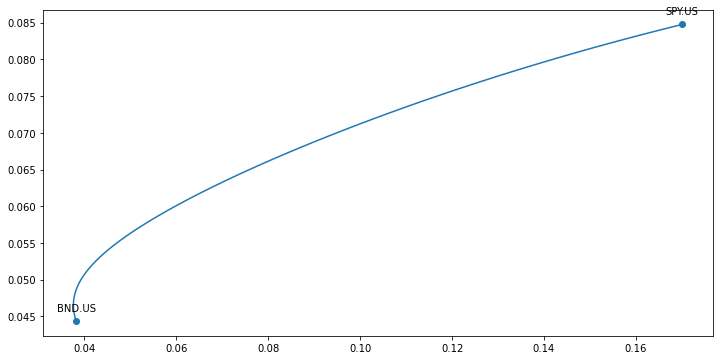

In [22]:
fig = plt.figure()

# Plotting the assets
ok.Plots(ls2, curr=curr).plot_assets(kind='cagr_app')
ax = plt.gca()

# Plotting the Efficient Frontier
ax.plot(df['Risk'], df['CAGR (approx)']);

It's possible to draw both efficient frontiers: for mean return and for CAGR with the same dataframe.

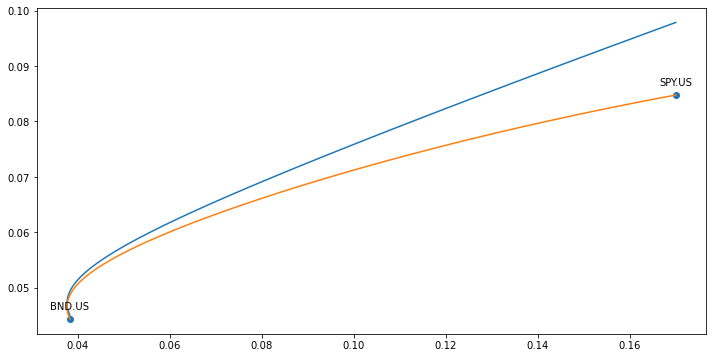

In [21]:
fig = plt.figure()

# Plotting the assets
ok.Plots(ls2, curr=curr).plot_assets(kind='cagr_app')
ax = plt.gca()

# Plotting the Efficient Frontiers
# EF with mean return
ax.plot(df['Risk'], df['Mean return'])
# EF with CAGR
ax.plot(df['Risk'], df['CAGR (approx)']);

### Several assets

Let's add a popular fisical gold and real estate ETFs...

In [2]:
ls4 = ['SPY.US', 'BND.US', 'GLD.US', 'VNQ.US']
curr = 'USD'
four_assets = ok.EfficientFrontier(symbols=ls4, curr=curr, n_points=100)
four_assets

symbols              [SPY.US, BND.US, GLD.US, VNQ.US]
currency                                          USD
first date                                    2007-05
last_date                                     2020-09
period length (Y)                                13.3
inflation                                    USD.INFL
dtype: object

In [5]:
df4 = four_assets.ef_points

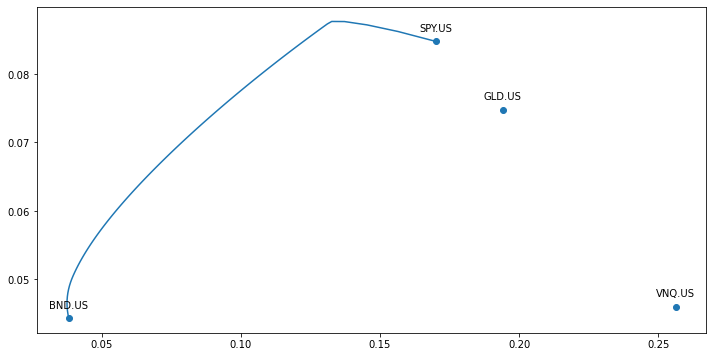

In [22]:
fig = plt.figure()

# Plotting the assets
ok.Plots(ls4, curr=curr).plot_assets(kind='cagr_app')
ax = plt.gca()

# Plotting the Efficient Frontier
ax.plot(df4['Risk'], df4['CAGR (approx)']);

### Efficient frontier for each pare of assets

Sometimes it can be helpfull to see how each pare of assets "contibutes" to the common efficient frontier by drawing all the pair frontiers.

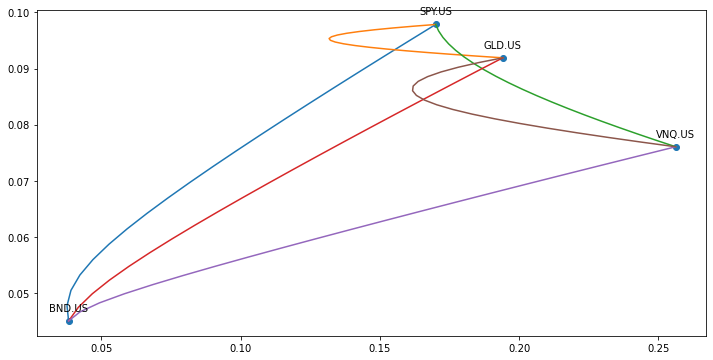

In [4]:
ok.Plots(ls4, curr=curr).plot_pair_ef();

We can see all efficent frontiers (pairs and 4 assets) in a common chart ...

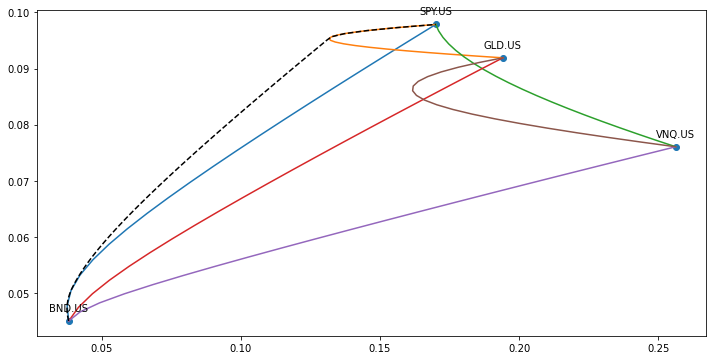

In [7]:
fig = plt.figure()

# Plotting the assets
ok.Plots(ls4, curr=curr).plot_pair_ef()

ax = plt.gca()

# Plotting the Efficient Frontier
ax.plot(df4['Risk'], df4['Mean return'], color = 'black', linestyle='--');

### Global Minimum Variance (GMV) portfolio

GMV weights and values could be found with **gmv_weights**, **gmv_monthly** and **gmv_annualized** methods.

weights of GMV portfolio:

In [8]:
four_assets.gmv_weights

array([0.0435507, 0.9564493, 0.       , 0.       ])

Risk and mean return on monthly basis:

In [9]:
four_assets.gmv_monthly

(0.010400448743389834, 0.0038605745776622374)

Risk and mean return annualized:

In [10]:
four_assets.gmv_annualized

(0.03759917232940703, 0.04732333034069702)

With annualized values it's easy to draw the GMV point on the chart.

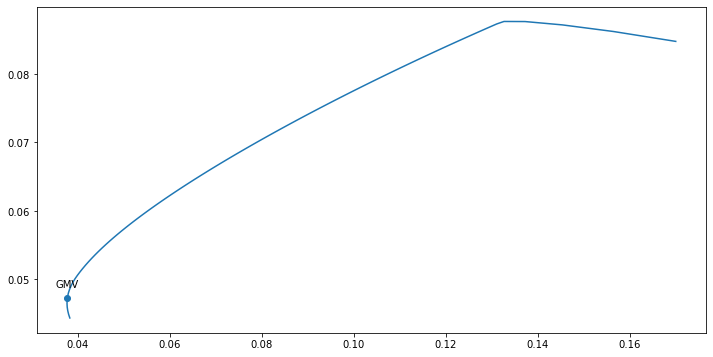

In [23]:
fig = plt.figure()
ax = plt.gca()

# Plotting the Efficient Frontier
ax.plot(df4['Risk'], df4['CAGR (approx)']);

# plotting GMV point
ax.scatter(four_assets.gmv_annualized[0], four_assets.gmv_annualized[1])

# annotations for GMV point
ax.annotate("GMV",  # this is the text
                        (four_assets.gmv_annualized[0], four_assets.gmv_annualized[1]),  # this is the point to label
                        textcoords="offset points",  # how to position the text
                        xytext=(0, 10),  # distance from text to points (x,y)
                        ha='center');  # horizontal alignment can be left, right or center